In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("uber.csv")


In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.drop(columns=['Unnamed: 0','key'], inplace = True)

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.dropna(how="any",inplace = True)

In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

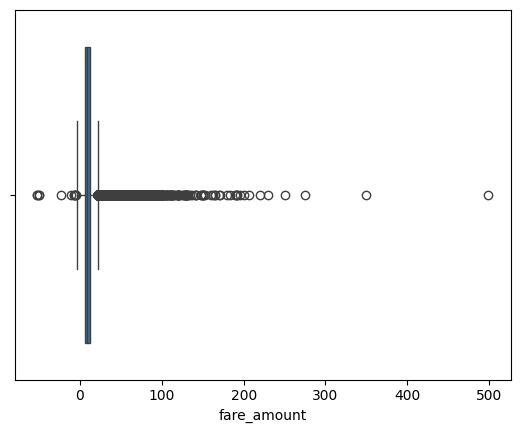

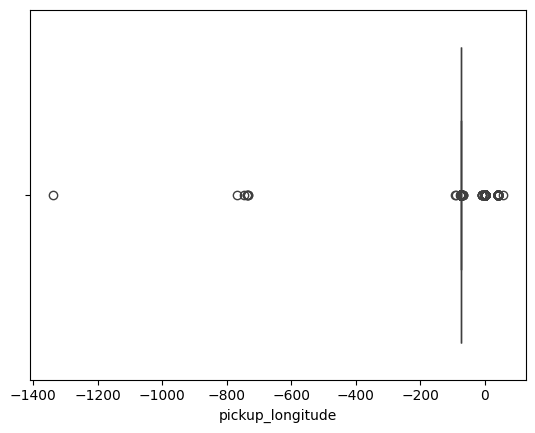

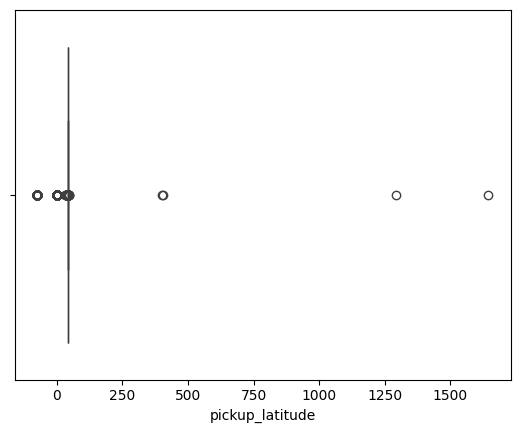

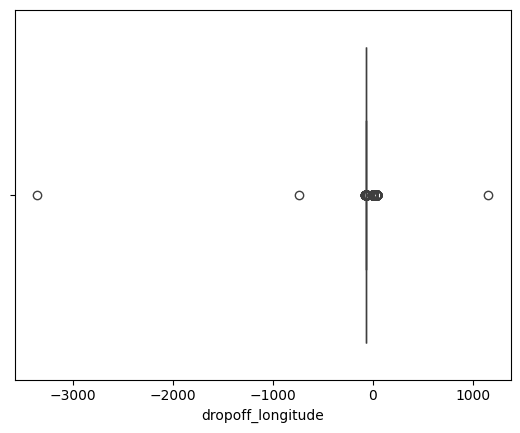

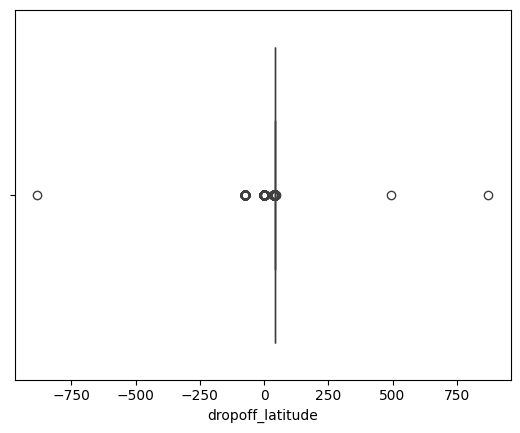

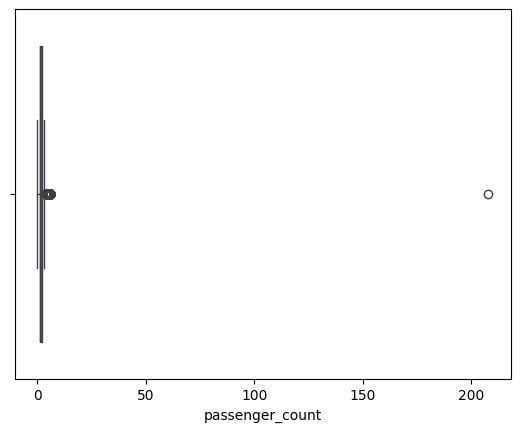

In [12]:
for i in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df,x=i)

In [13]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
df = df[
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) & (df.pickup_longitude > -180) & (df.pickup_longitude < 180) & (df.dropoff_latitude > -90) & (df.dropoff_latitude < 90) & (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) 
    & (df.fare_amount > 0) & (df.passenger_count > 0) & (df.passenger_count < 50)
]

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [21]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [17]:
# from math import cos, asin, sqrt, pi
# import numpy as np

# def distance(lat_1,lon_1,lat_2,lon_2):
# #     lat1 = row.pickup_latitude
# #     lon1 = row.pickup_longitude
# #     lat2 = row.dropoff_latitude
# #     lon2 = row.dropoff_longitude
#     lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
#     diff_lon = lon_2 - lon_1
#     diff_lat = lat_2 - lat_1
    

#     km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
#     return km
from geopy.distance import geodesic

# Function to calculate the distance between two points using geopy
def calculate_distance(row):
    start = (row['pickup_latitude'], row['pickup_longitude'])
    end = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(start, end).kilometers

# Apply function to each row in the DataFrame
df['Distance'] = df.apply(calculate_distance, axis=1)


/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/1980594013.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = df.apply(calculate_distance, axis=1)


In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.483730
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112128
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.879635
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.867916
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.536552


<Axes: xlabel='Distance'>

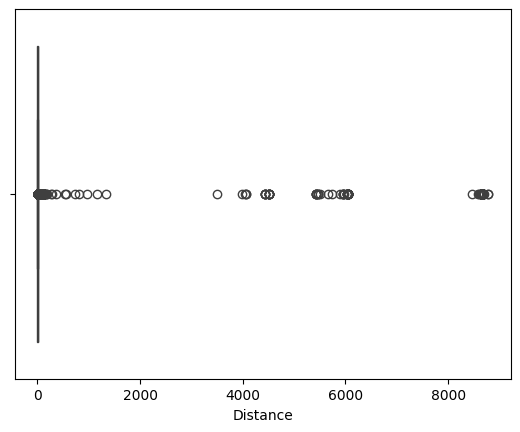

In [20]:
sns.boxplot(data=df,x='Distance')

In [21]:
df = df[(df['Distance']>0) & (df['Distance']<200)]

In [22]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.483730
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112128
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.879635
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.867916
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.536552


<Axes: xlabel='Distance'>

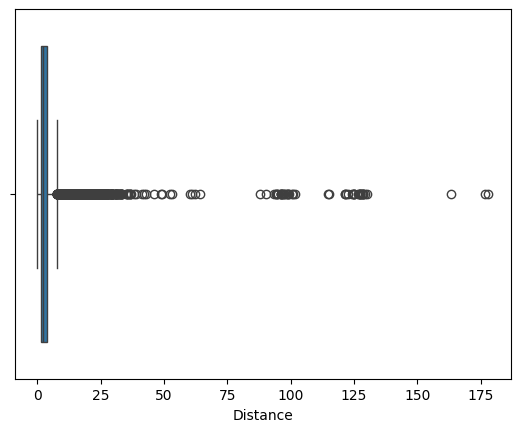

In [23]:
sns.boxplot(data=df,x='Distance')

In [24]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/1295461447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [25]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112128
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.879635
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.867916
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.536552


In [26]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour


/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/2876573993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = df['pickup_datetime'].dt.day_name()
/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/2876573993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['pickup_datetime'].dt.year
/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/2876573993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [27]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,week_day,year,month,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,Thursday,2015,5,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,Friday,2009,7,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,Monday,2009,8,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,Friday,2009,6,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,Thursday,2014,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,Sunday,2012,10,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,Friday,2014,3,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,Monday,2009,6,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,Wednesday,2015,5,14


In [28]:
df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/3782303944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)


In [29]:
df

,fare_amount,passenger_count,Distance,week_day,year,month,hour
0,7.5,1,1.681111,Thursday,2015,5,19
1,7.7,1,2.454363,Friday,2009,7,20
2,12.9,1,5.039603,Monday,2009,8,21
3,5.3,3,1.661442,Friday,2009,6,8
4,16.0,5,4.483730,Thursday,2014,8,17
...,...,...,...,...,...,...,...
199995,3.0,1,0.112128,Sunday,2012,10,10
199996,7.5,1,1.879635,Friday,2014,3,1
199997,30.9,2,12.867916,Monday,2009,6,0
199998,14.5,1,3.536552,Wednesday,2015,5,14


In [31]:
temp = df.copy()

def convertdays(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday']:
        return 0
    return 1
def converthour(hour):
    if 5<=hour<=12:
        return 1
    elif 12<hour<=17:
        return 2
    elif 17<hour<=24:
        return 3
    else:
        return 0


df['week_day'] = temp['week_day'].apply(convertdays)
df['hour']  = temp['hour'].apply(converthour)

/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/2337018338.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = temp['week_day'].apply(convertdays)
/var/folders/nv/9jn8dp9j3qn4qb674y2qj5k00000gn/T/ipykernel_13755/2337018338.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']  = temp['hour'].apply(converthour)


In [32]:
df

,fare_amount,passenger_count,Distance,week_day,year,month,hour
0,7.5,1,1.681111,0,2015,5,3
1,7.7,1,2.454363,1,2009,7,3
2,12.9,1,5.039603,0,2009,8,3
3,5.3,3,1.661442,1,2009,6,1
4,16.0,5,4.483730,0,2014,8,2
...,...,...,...,...,...,...,...
199995,3.0,1,0.112128,1,2012,10,1
199996,7.5,1,1.879635,1,2014,3,0
199997,30.9,2,12.867916,0,2009,6,0
199998,14.5,1,3.536552,0,2015,5,2


In [34]:
df.corr()

,fare_amount,passenger_count,Distance,week_day,year,month,hour
fare_amount,1.000000,0.011884,0.779014,0.002305,0.120430,0.024120,-0.021078
passenger_count,0.011884,1.000000,0.005114,0.035882,0.005339,0.008818,0.013572
Distance,0.779014,0.005114,1.000000,0.014487,0.018639,0.007386,-0.022716
week_day,0.002305,0.035882,0.014487,1.000000,0.006910,-0.007328,-0.078129
year,0.120430,0.005339,0.018639,0.006910,1.000000,-0.115182,0.001131
month,0.024120,0.008818,0.007386,-0.007328,-0.115182,1.000000,-0.005410
hour,-0.021078,0.013572,-0.022716,-0.078129,0.001131,-0.005410,1.000000


<Axes: xlabel='Distance', ylabel='fare_amount'>

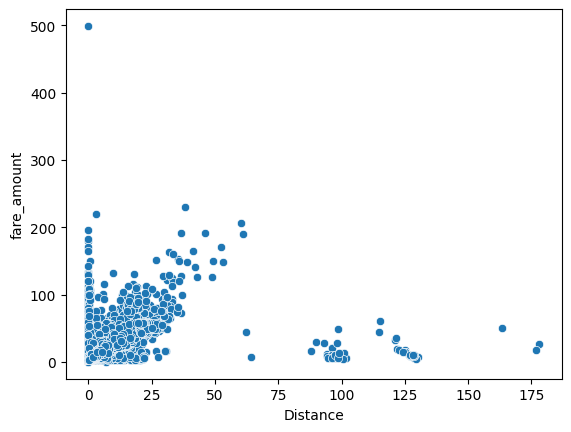

In [35]:
sns.scatterplot(y=df['fare_amount'], x=df['Distance'])

In [36]:
x = df[['Distance']].values
y = df['fare_amount'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)



In [37]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()

In [38]:
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

In [39]:
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.fit_transform(y_test)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    print('R-squared: ', r_squared)
    print('RMSE: ', rmse)



In [47]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

R-squared:  0.6048445947011574
RMSE:  0.6286138761583636


In [48]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

R-squared:  0.6611931951535175
RMSE:  0.5820711338371647
